# Experiment Description

<p> In this set of experiments, we are going to test four different kinds of <b>manually designed templates</b> for
prompting a <b>T5-large</b> language model for the binary sentiment classification task on <b>SST-2</b> dataset and 3-way sentiment classification task on the <b>SemEval 2018</b> dataset. </p>

<p> With manual templates, we no longer need any training examples and we will only make predictions on the corresponding development sets for these two datasets. </p>

# Instruction Types
<p> We have four templates to prompt the language model for sentiment analsis:
<ul>
  <li><b>No Template</b>
  <br><br>
  This is where we just feed the input sentence without changing any input format.<br>
  Example: <br>
  - <b>Sentence:</b>
  <br>
  'I hate watching this movie.'
  <br>
  - <b>Input to the model:</b>
  <br>
  'I hate watching this movie.'
  </li>
  <br>
  <li>
  <b>Instruction Prefix</b>
  <br><br>
  We include a task description as an instruction before the actual sentence.
  <br>
  Example for binary sentiment classification:
  <br>
  - <b>Sentence:</b>
  <br>
  'I hate watching this movie.'
  <br>
  - <b>Input to the model:</b>
  <br>
  'Generate the sentiment of the next sentence. I hate watching this movie.'
  </li>
  <br>
  <li><b>Instruction Suffix</b>
  <br><br>
  We include an instruction at the end of the sentence for the sentiment classification task.
  <br>
  Example for binary sentiment classification:
  <br>
  - <b>Sentence:</b>
  <br>
  'I hate watching this movie.'
  <br>
  - <b>Input to the model:</b>
  <br>
  'I hate watching this movie. Generate the sentiment of the previous sentence.'
  </li>
  <br>
  <li><b>Questin-Answering Format</b>
  <br><br>
  We know this knowledge that the underlying T5 models are also pre-trained on QA datasets with a specific QA format. We will transfer sentiment classification to a generative QA task.
  <br>
  Example for binary sentiment classification:
  <br>
  - <b>Sentence:</b>
  <br>
  'I hate watching this movie.'
  <br>
  - <b>Input to the model:</b>
  <br>
  'question: what would be the sentiment of the sentence? context: I hate watching this movie.'
  </li>
  <br>
</ul>

</p>

<font color='red'>__Some important considerations__: If you are getting CUDA out-of-memory errors on this notebook, you may try a few things

1. Shutdown other notebooks that are running on the Jupyter instance (go to the “running” tab to see what else is running simultaneously)

2. Reduce the batch size in the commands launching inference or training

3. Start the notebooks up on an A40 GPU following the readme here: `src/reference_implementations/prompt_zoo/README.md`
</font>

<p>Navigate to the directory containing src. This command should only be run once</p>

In [1]:
import os

os.chdir("../../../../")

# define the user main directory to store predictions and training checkpoints.
os.environ["USER_DIR"] = f"/scratch/ssd004/scratch/{os.environ['USER']}"

# Experiment 1 on SemEval Sentiment (Random Guess Performance: 0.33)

In the first Experiment, we are going to make predictions on the semeval 3-way sentiment classification task without any prompt templates added to the input.

Please note that we are calling a trainer module, but we only load the T5 large for prediction with the default pre-trained weights from the huggingface library and we don't update the weights. The experiment type `no_finetune` corresponds to this prediction only mode with the default T5.

In [46]:
!mkdir -p "${USER_DIR}/template_experiments"
!mkdir -p "${USER_DIR}/template_experiments/semeval"
!mkdir -p "${USER_DIR}/template_experiments/semeval/experiment1_no_template"

We run our prediction script with the required arguments for the no template experiment.

In [47]:
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --task_name semeval \
    --t5_exp_type no_finetune \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path ${USER_DIR}/template_experiments/semeval/experiment1_no_template \
    --prediction_file ${USER_DIR}/template_experiments/semeval/experiment1_no_template/semeval.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-04-27 16:15:17.857345: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-04-27 16:15:17.857467: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-04-27 16:15:17.857544: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-04-27 16:15:17.857616: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: 

# Experiment 2 on SemEval Sentiment

In our second experiment, we are going to include the instruction as the prefix to the beginning of the sentence.

In [48]:
!mkdir -p "${USER_DIR}/template_experiments/semeval/experiment2_instruction_at_start"
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --task_name semeval \
    --t5_exp_type no_finetune \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path ${USER_DIR}/template_experiments/semeval/experiment2_instruction_at_start \
    --prediction_file ${USER_DIR}/template_experiments/semeval/experiment2_instruction_at_start/semeval.predictions.csv \
    --instruction_type instruction_at_start \
    --t5_pretrained_model google/t5-large-lm-adapt

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-04-27 16:20:52.348464: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-04-27 16:20:52.348739: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-04-27 16:20:52.348953: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-04-27 16:20:52.349201: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: 

# Experiment 3 on SemEval Sentiment

In our third experiment, we are going to include the instruction at the end of the input sentence.

In [49]:
!mkdir -p "${USER_DIR}/template_experiments/semeval/experiment3_instruction_at_end"
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --task_name semeval \
    --t5_exp_type no_finetune \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path ${USER_DIR}/template_experiments/semeval/experiment3_instruction_at_end \
    --prediction_file ${USER_DIR}/template_experiments/semeval/experiment3_instruction_at_end/semeval.predictions.csv \
    --instruction_type instruction_at_end \
    --t5_pretrained_model google/t5-large-lm-adapt

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-04-27 16:22:36.598443: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-04-27 16:22:36.598741: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-04-27 16:22:36.598954: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-04-27 16:22:36.599176: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: 

# Experiment 4 on SemEval Sentiment


In our last experiment on semeval, we are going to use the question-answering format for sentiment analysis.

In [50]:
!mkdir -p "${USER_DIR}/template_experiments/semeval/experiment4_qa"
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --task_name semeval \
    --t5_exp_type no_finetune \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --test_file ./resources/datasets/2018-Valence-oc-En-dev.txt \
    --model_path ${USER_DIR}/template_experiments/semeval/experiment4_qa \
    --prediction_file ${USER_DIR}/template_experiments/semeval/experiment4_qa/semeval.predictions.csv \
    --instruction_type qa \
    --t5_pretrained_model google/t5-large-lm-adapt

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-04-27 16:25:20.392716: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-04-27 16:25:20.393212: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-04-27 16:25:20.393483: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-04-27 16:25:20.393714: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: 

In [51]:
!tensorboard --logdir=${USER_DIR}/template_experiments/semeval/ --bind_all

2023-04-27 16:27:25.669124: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-27 16:27:25.669154: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-27 16:27:27.242936: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-27 16:27:27.284738: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-27 16:27:27.286110: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic l

The tensorboard command above will finish and stall in the terminal you're working with. Now, in another terminal window, create an ssh tunnel to the port 6008 we used in the above command from your local computer:

To view the tensorboard, we have to create another ssh tunnel from the local computer to the gpu node.
use the following command with the port specified by the tensorboard command above (e.g. 6006)
then type following URL in your local web browser: http://localhost:6006/

`ssh username@v.vectorinstitute.ai -L 6006:gpu001:6006`

__NOTE__: You will need to create a tunnel directory to the v instance that you are starting the tensorboard on. This will be one of `v1`, `v2`, or `v3`. It is written in your prompt as `username@v#`... so replace `v` in the command below with the `v#` that you have on your command line

# Results on SemEval
You should see the following results.
Using the Question-Answering format wins over other instruction templates.

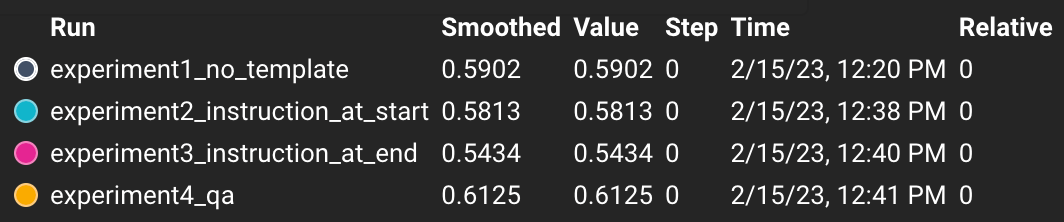

# Experiments on SST-2 Binary Sentiment Classification Task
Similar to SemEval, we can use our four types of templates to query a t5-large language model for binary sentiment classification
as evaluated on the sst-2 validation split.

__NOTE__: If you ran the tensorboard command above, you'll need to stop the cell manually to move to this stage.

In [52]:
!mkdir -p "${USER_DIR}/template_experiments/sst2/"
!mkdir -p "${USER_DIR}/template_experiments/sst2/experiment1_no_template"
!mkdir -p "${USER_DIR}/template_experiments/sst2/experiment2_instruction_at_start"
!mkdir -p "${USER_DIR}/template_experiments/sst2/experiment3_instruction_at_end"
!mkdir -p "${USER_DIR}/template_experiments/sst2/experiment4_qa"

In [53]:
# exp1
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --task_name sst2 \
    --t5_exp_type no_finetune \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --train_file train \
    --dev_file validation \
    --test_file validation \
    --model_path ${USER_DIR}/template_experiments/sst2/experiment1_no_template \
    --prediction_file ${USER_DIR}/template_experiments/sst2/experiment1_no_template/sst2.predictions.csv \
    --instruction_type no_instruction \
    --t5_pretrained_model google/t5-large-lm-adapt

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-04-27 16:31:46.112974: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-04-27 16:31:46.113094: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-04-27 16:31:46.113172: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-04-27 16:31:46.113245: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: 

In [54]:
# exp2
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --task_name sst2 \
    --t5_exp_type no_finetune \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --train_file train \
    --dev_file validation \
    --test_file validation \
    --model_path ${USER_DIR}/template_experiments/sst2/experiment2_instruction_at_start \
    --prediction_file ${USER_DIR}/template_experiments/sst2/experiment2_instruction_at_start/sst2.predictions.csv \
    --instruction_type instruction_at_start \
    --t5_pretrained_model google/t5-large-lm-adapt

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-04-27 16:33:20.523281: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-04-27 16:33:20.523396: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-04-27 16:33:20.523469: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-04-27 16:33:20.523537: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: 

In [55]:
# exp3
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --task_name sst2 \
    --t5_exp_type no_finetune \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --train_file train \
    --dev_file validation \
    --test_file validation \
    --model_path ${USER_DIR}/template_experiments/sst2/experiment3_instruction_at_end \
    --prediction_file ${USER_DIR}/template_experiments/sst2/experiment3_instruction_at_end/sst2.predictions.csv \
    --instruction_type instruction_at_end \
    --t5_pretrained_model google/t5-large-lm-adapt

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-04-27 16:35:12.631055: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-04-27 16:35:12.631430: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-04-27 16:35:12.631693: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-04-27 16:35:12.631966: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: 

In [56]:
# exp4
!python -m src.reference_implementations.prompt_zoo.trainer \
    --eval_batch_size 2048 \
    --task_name sst2 \
    --t5_exp_type no_finetune \
    --source_max_length 64 \
    --decoder_max_length 16 \
    --train_file train \
    --dev_file validation \
    --test_file validation \
    --model_path ${USER_DIR}/template_experiments/sst2/experiment4_qa \
    --prediction_file ${USER_DIR}/template_experiments/sst2/experiment4_qa/sst2.predictions.csv \
    --instruction_type qa \
    --t5_pretrained_model google/t5-large-lm-adapt

[nltk_data] Downloading package punkt to /h/snajafi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-04-27 16:36:59.001088: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-04-27 16:36:59.001203: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2023-04-27 16:36:59.001277: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2023-04-27 16:36:59.001346: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: 

Re-launch the tensorboard to view the updated results with sst2 and follow the same instructions as outlined above in the Semeval case

In [57]:
!tensorboard --logdir=${USER_DIR}/template_experiments/ --bind_all

2023-04-27 16:39:02.909019: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-27 16:39:02.909051: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-27 16:39:04.797655: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-27 16:39:04.842109: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-27 16:39:04.843730: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic l

# Results from SST2
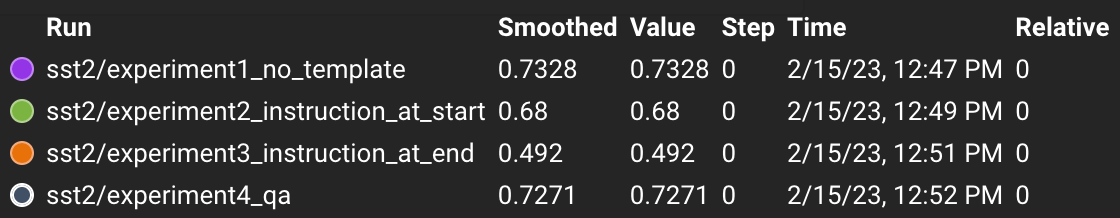